# Case study on Regression

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better. 

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Ignore warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the dataset
data=pd.read_csv('car_age_price.csv')

# Checking basic details on dataset

In [4]:
#Cheking for any inaccuracy in dataset using head and tail function
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [6]:
#Checking the number of rows and columns(dimensions)
data.shape

(112, 2)

In [7]:
#Checking the summary of statistics pertaining to the columns
data.describe()


,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
#Checking the information(concise summary of DataFrame)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


Feature is in numerical form

In [9]:
#Checking null values in each columns
data.isnull().sum()

Year     0
Price    0
dtype: int64

No null values in dataset

<AxesSubplot:xlabel='Year'>

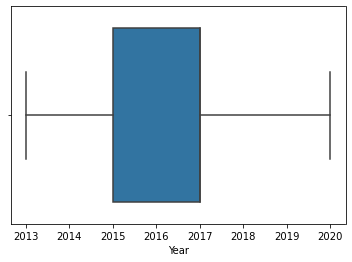

In [10]:
#Checking for any outliers
sns.boxplot(data['Year'])

No outliers present in dataset

In [11]:
#Checking number of unique values in Year
data['Year'].nunique()

8

In [12]:
#Checking what are those unique values
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

<AxesSubplot:xlabel='Year', ylabel='Price'>

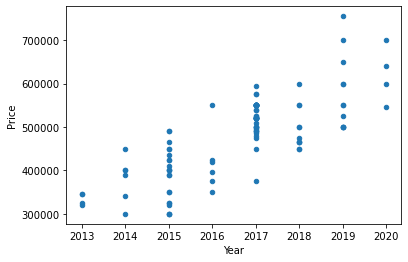

In [13]:
#Scatterplot vsualization
data.plot.scatter(x='Year',y='Price')

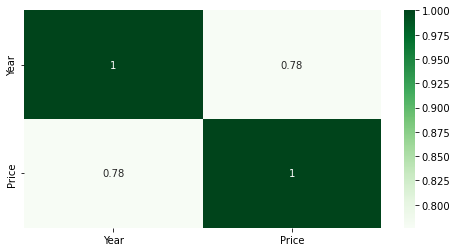

In [14]:
#Correlation of feature and target 
cor=data.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(cor,annot=True,cmap='Greens')
plt.show()

Year and price are highly correlated

# Splitting the dataset

In [15]:
X = data['Year']
y = data['Price']

In [16]:
#reshaping
X = np.array(X).reshape(-1,1)

# Splitting data to training and testing sets

In [17]:
#importing library from sklearn
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Linear Regression model

In [19]:
#Importing library for the same
from sklearn.linear_model import LinearRegression

In [20]:
#Creating an instance
lr_reg = LinearRegression()

In [21]:
#Building the model
lr_model=lr_reg.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

Evaluation of model

In [22]:
#importing libraries for the same
from sklearn.metrics import mean_squared_error,r2_score

In [23]:
print('The mean squared error for linear model is :',mean_squared_error(y_test,y_pred))
print('The R squared error for linear model is :',r2_score(y_test,y_pred))

The mean squared error for linear model is : 4326906256.829671
The R squared error for linear model is : 0.36759313425902185


# Lets look at the model score for training and test data

In [24]:
print('The model score on training data is :',lr_model.score(X_train, y_train))
print('The model score on testing data is :',lr_model.score(X_test, y_test))

The model score on training data is : 0.6389354253755697
The model score on testing data is : 0.36759313425902185


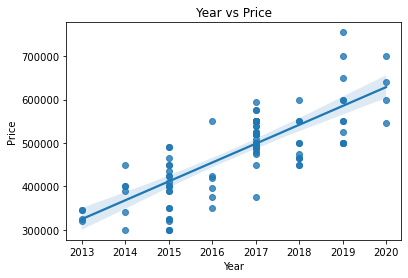

In [25]:
sns.regplot(x = "Year", y = "Price", data = data)
plt.title("Year vs Price")
plt.show()

Eventhough the line fit the training data really well,it had low Bias.It did not fit the testing data ver well at all which means it has high variance.

As the model score for trainig and test data differs its shows overfitting. We can use Lasso regression to regularise the overfitting issue.

# Prediction for the year 2022

In [26]:
pred_2022=lr_model.predict([[2022]])
print('The prediction for possible price of a 2022 model second-hand grand i10 is :',pred_2022)

The prediction for possible price of a 2022 model second-hand grand i10 is : [743601.61594504]


# Lasso Regresion model

Lasso deals with overfitting by shrinking the parameterts towards 0

In [27]:
#for finding the best value for alpha we use GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [28]:
lasso_model = Lasso()
params = {'alpha': np.arange(1e-15, 100)}
lasso_regressor = GridSearchCV(lasso_model, params, scoring='neg_mean_squared_error', cv=5)

las_model=lasso_regressor.fit(X,y)
print('The best value for alpha :',lasso_regressor.best_params_)
print('MSE for lasso regression is :',np.abs(lasso_regressor.best_score_))

The best value for alpha : {'alpha': 1e-15}
MSE for lasso regression is : 3564922131.7258463


In [29]:
#y_test prediction
lasso_y_pred = lasso_regressor.predict(X_test)

 Evaluation of lasso model

In [30]:
print('The mean squared error of lasso model is :',mean_squared_error(y_test,lasso_y_pred))
print('The R squared error of lasso model is :',r2_score(y_test,lasso_y_pred))

The mean squared error of lasso model is : 3652515706.7561846
The R squared error of lasso model is : 0.46615991355638453


# Prediction for year 2022 using lasso regression

In [31]:
lasso_2022=lasso_regressor.predict([[2022]])
print('The prediction for possible price of a 2022 model by lasso regression of a second-hand grand i10 is :',lasso_2022)

The prediction for possible price of a 2022 model by lasso regression of a second-hand grand i10 is : [715488.07850976]


# Comparison of Linear and Lasso model

# Linear model:

The mean squared error for linear model is : 4326906256.829671


The R squared error for linear model is : 0.36759313425902185

# Lasso model:

The mean squared error of lasso model is : 3652515706.7561846


The R squared error of lasso model is : 0.46615991355638453

# Lasso regression model has comparitively low error than Linear and hence it could be a better model than Linear